In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.dates as mdates

In [104]:
city_air_data=pd.read_csv('city_day.csv')
city_air_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [105]:
festivals=pd.read_csv('rawfest.txt')
festivals.dropna()

,Year \tMakar Sakranti \tVasant Panchami \tMaha Shiva Ratri \tHoli \tHindi New Year \tRama Navami \tNavaratri \tDiwali
0,2016 \tJan. 15 \tFeb. 12 \tMarch 7 \tMarch 24 ...
1,2017 \tJan. 14 \tFeb. 1 \tFeb. 24 \tMarch 13 \...
2,2018 \tJan. 14 \tJan. 21 \tFeb. 13 \tMarch 2 \...
3,2019 \tJan. 14 \tFeb. 9 \tMarch 5 \tMarch 21 \...
4,2020 \tJan. 14 \tJan. 29 \tFeb. 21 \tMarch 9 \...
5,2021 \tJan. 14 \tFeb. 16 \tMarch 11 \tMarch 28...
6,2022 \tJan. 14 \tFeb. 5 \tFeb. 28 \tMarch 18 \...
7,2023 \tJan. 14 \tJan. 25 \tFeb. 18 \tMarch 7 \...
8,2024 \tJan. 14 \tFeb. 13 \tMarch 8 \tMarch 25 ...
9,2025 \tJan. 14 \tFeb. 2 \tFeb. 25 \tMarch 14 \...


In [106]:
with open('rawfest.txt', 'r+') as file:
    content=file.readlines()
    for i in range(len(content)-9):
        x=content[i].split('\t')
        x=','.join(x)
        with open('cleandata.txt','a+') as cleandata:
            cleandata.write(x)

In [107]:
festivals=pd.read_csv('cleandata.txt')
#festivals.columns=['Year', 'Makar Sankaranti', 'Vasant Panchami', 'Maha Shiva Ratri', 'Holi', 'Hindi New Year', 'Rama Navami', 'Navaratri', 'Diwali']
festivals.columns=festivals.columns.str.replace(r' ', '')
festivals

,Year,MakarSakranti,VasantPanchami,MahaShivaRatri,Holi,HindiNewYear,RamaNavami,Navaratri,Diwali
0,2016,Jan. 15,Feb. 12,March 7,March 24,April 8,April 15,Oct. 1,Oct. 30
1,2017,Jan. 14,Feb. 1,Feb. 24,March 13,March 28,April 5,Sept. 21,Oct. 19
2,2018,Jan. 14,Jan. 21,Feb. 13,March 2,March 18,March 25,Oct. 9,Nov. 6
3,2019,Jan. 14,Feb. 9,March 5,March 21,April 5,April 13,Sept. 29,Oct. 27
4,2020,Jan. 14,Jan. 29,Feb. 21,March 9,March 24,April 2,Oct. 17,Nov. 14
5,2021,Jan. 14,Feb. 16,March 11,March 28,April 12,April 21,Oct. 6,Nov. 4
6,2022,Jan. 14,Feb. 5,Feb. 28,March 18,April 1,April 10,Sept. 26,Oct. 24
7,2023,Jan. 14,Jan. 25,Feb. 18,March 7,March 22,March 30,Oct. 15,Nov. 12
8,2024,Jan. 14,Feb. 13,March 8,March 25,April 9,April 16,Oct. 3,Oct. 31


In [108]:
Delhi_air=city_air_data[city_air_data['City']=='Delhi']
Delhi_air

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [109]:
festivals=festivals.where(festivals['Year']<=2019).dropna()
festivals

,Year,MakarSakranti,VasantPanchami,MahaShivaRatri,Holi,HindiNewYear,RamaNavami,Navaratri,Diwali
0,2016.0,Jan. 15,Feb. 12,March 7,March 24,April 8,April 15,Oct. 1,Oct. 30
1,2017.0,Jan. 14,Feb. 1,Feb. 24,March 13,March 28,April 5,Sept. 21,Oct. 19
2,2018.0,Jan. 14,Jan. 21,Feb. 13,March 2,March 18,March 25,Oct. 9,Nov. 6
3,2019.0,Jan. 14,Feb. 9,March 5,March 21,April 5,April 13,Sept. 29,Oct. 27


In [110]:
festivals['Year']=festivals['Year'].apply(pd.to_datetime, format='%Y').dt.year
#festivals['Year'].dt.year
festivals

,Year,MakarSakranti,VasantPanchami,MahaShivaRatri,Holi,HindiNewYear,RamaNavami,Navaratri,Diwali
0,2016,Jan. 15,Feb. 12,March 7,March 24,April 8,April 15,Oct. 1,Oct. 30
1,2017,Jan. 14,Feb. 1,Feb. 24,March 13,March 28,April 5,Sept. 21,Oct. 19
2,2018,Jan. 14,Jan. 21,Feb. 13,March 2,March 18,March 25,Oct. 9,Nov. 6
3,2019,Jan. 14,Feb. 9,March 5,March 21,April 5,April 13,Sept. 29,Oct. 27


In [111]:
Delhi_air['Date']=Delhi_air['Date'].apply(pd.to_datetime)
Delhi_air

<ipython-input-111-c9d39cbd6fc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delhi_air['Date']=Delhi_air['Date'].apply(pd.to_datetime)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [112]:
festivalsexp=festivals.copy()
len(festivalsexp.columns)

9

In [113]:
for i in range(1,len(festivalsexp.columns)):
    print(festivalsexp.columns[i])
    x=festivalsexp[festivalsexp.columns[i]].str.split(' ', expand=True)
    festivalsexp[festivalsexp.columns[i]+'1']=x[0]
    festivalsexp[festivalsexp.columns[i]+'2']=x[1]

festivalsexp

MakarSakranti
VasantPanchami
MahaShivaRatri
Holi
HindiNewYear
RamaNavami
Navaratri
Diwali


,Year,MakarSakranti,VasantPanchami,MahaShivaRatri,Holi,HindiNewYear,RamaNavami,Navaratri,Diwali,MakarSakranti1,...,Holi1,Holi2,HindiNewYear1,HindiNewYear2,RamaNavami1,RamaNavami2,Navaratri1,Navaratri2,Diwali1,Diwali2
0,2016,Jan. 15,Feb. 12,March 7,March 24,April 8,April 15,Oct. 1,Oct. 30,Jan.,...,March,24,April,8,April,15,Oct.,1,Oct.,30
1,2017,Jan. 14,Feb. 1,Feb. 24,March 13,March 28,April 5,Sept. 21,Oct. 19,Jan.,...,March,13,March,28,April,5,Sept.,21,Oct.,19
2,2018,Jan. 14,Jan. 21,Feb. 13,March 2,March 18,March 25,Oct. 9,Nov. 6,Jan.,...,March,2,March,18,March,25,Oct.,9,Nov.,6
3,2019,Jan. 14,Feb. 9,March 5,March 21,April 5,April 13,Sept. 29,Oct. 27,Jan.,...,March,21,April,5,April,13,Sept.,29,Oct.,27


In [114]:
festivalsexp

,Year,MakarSakranti,VasantPanchami,MahaShivaRatri,Holi,HindiNewYear,RamaNavami,Navaratri,Diwali,MakarSakranti1,...,Holi1,Holi2,HindiNewYear1,HindiNewYear2,RamaNavami1,RamaNavami2,Navaratri1,Navaratri2,Diwali1,Diwali2
0,2016,Jan. 15,Feb. 12,March 7,March 24,April 8,April 15,Oct. 1,Oct. 30,Jan.,...,March,24,April,8,April,15,Oct.,1,Oct.,30
1,2017,Jan. 14,Feb. 1,Feb. 24,March 13,March 28,April 5,Sept. 21,Oct. 19,Jan.,...,March,13,March,28,April,5,Sept.,21,Oct.,19
2,2018,Jan. 14,Jan. 21,Feb. 13,March 2,March 18,March 25,Oct. 9,Nov. 6,Jan.,...,March,2,March,18,March,25,Oct.,9,Nov.,6
3,2019,Jan. 14,Feb. 9,March 5,March 21,April 5,April 13,Sept. 29,Oct. 27,Jan.,...,March,21,April,5,April,13,Sept.,29,Oct.,27


In [169]:
d={}
e =pd.date_range('2000-01-01', freq='M', periods=12).strftime('%b.')
for i in range(0,12):
    if i <9:
        d[e[i]]=f'0{i+1}-'
    else:
        d[e[i]]=f'{i+1}-'
d['March']=d['Mar.']
del d['Mar.']
d['April']=d['Apr.']
del d['Apr.']
d['Sept.']=d['Sep.']
del d['Sep.']
d

{'Jan.': '01-',
 'Feb.': '02-',
 'May.': '05-',
 'Jun.': '06-',
 'Jul.': '07-',
 'Aug.': '08-',
 'Oct.': '10-',
 'Nov.': '11-',
 'Dec.': '12-',
 'March': '03-',
 'April': '04-',
 'Sept.': '09-'}

In [177]:
monthchange=festivalsexp.iloc[:,9::2].copy()
monthchange

,MakarSakranti1,VasantPanchami1,MahaShivaRatri1,Holi1,HindiNewYear1,RamaNavami1,Navaratri1,Diwali1
0,Jan.,Feb.,March,March,April,April,Oct.,Oct.
1,Jan.,Feb.,Feb.,March,March,April,Sept.,Oct.
2,Jan.,Jan.,Feb.,March,March,March,Oct.,Nov.
3,Jan.,Feb.,March,March,April,April,Sept.,Oct.


In [178]:
for i in range(len(monthchange.columns)):
    monthchange[monthchange.columns[i]]=monthchange[monthchange.columns[i]].map(d)
monthchange

,MakarSakranti1,VasantPanchami1,MahaShivaRatri1,Holi1,HindiNewYear1,RamaNavami1,Navaratri1,Diwali1
0,01-,02-,03-,03-,04-,04-,10-,10-
1,01-,02-,02-,03-,03-,04-,09-,10-
2,01-,01-,02-,03-,03-,03-,10-,11-
3,01-,02-,03-,03-,04-,04-,09-,10-


In [203]:
for i in range(len(monthchange.columns)):
    festivalsexp[monthchange.columns[i]]=monthchange[monthchange.columns[i]]
festivalsexp.drop(festivalsexp.iloc[:,1:9],axis=1)

,Year,MakarSakranti1,MakarSakranti2,VasantPanchami1,VasantPanchami2,MahaShivaRatri1,MahaShivaRatri2,Holi1,Holi2,HindiNewYear1,HindiNewYear2,RamaNavami1,RamaNavami2,Navaratri1,Navaratri2,Diwali1,Diwali2
0,2016,01-,15,02-,12,03-,7,03-,24,04-,8,04-,15,10-,1,10-,30
1,2017,01-,14,02-,1,02-,24,03-,13,03-,28,04-,5,09-,21,10-,19
2,2018,01-,14,01-,21,02-,13,03-,2,03-,18,03-,25,10-,9,11-,6
3,2019,01-,14,02-,9,03-,5,03-,21,04-,5,04-,13,09-,29,10-,27


In [206]:
for i in range(1,len(festivals.columns[i])):
    festivalsexp[festivals.columns[i]]=festivalsexp[festivals.columns[i]+'1']+festivalsexp[festivals.columns[i]+'2']
festivalsexp=festivalsexp.iloc[:,0:9]
festivalsexp

,Year,MakarSakranti,VasantPanchami,MahaShivaRatri,Holi,HindiNewYear,RamaNavami,Navaratri,Diwali
0,2016,01-15,02-12,03-7,03-24,04-8,04-15,10-1,10-30
1,2017,01-14,02-1,02-24,03-13,03-28,04-5,09-21,10-19
2,2018,01-14,01-21,02-13,03-2,03-18,03-25,10-9,11-6
3,2019,01-14,02-9,03-5,03-21,04-5,04-13,09-29,10-27


In [217]:
for i in range(1,len(festivalsexp.columns)):
    festivalsexp[festivalsexp.columns[i]]=festivalsexp[festivalsexp.columns[i]].apply(pd.to_datetime, format='%m-%d').dt.strftime('%m-%d')
festivalsexp

,Year,MakarSakranti,VasantPanchami,MahaShivaRatri,Holi,HindiNewYear,RamaNavami,Navaratri,Diwali
0,2016,01-15,02-12,03-07,03-24,04-08,04-15,10-01,10-30
1,2017,01-14,02-01,02-24,03-13,03-28,04-05,09-21,10-19
2,2018,01-14,01-21,02-13,03-02,03-18,03-25,10-09,11-06
3,2019,01-14,02-09,03-05,03-21,04-05,04-13,09-29,10-27


In [218]:
#2019


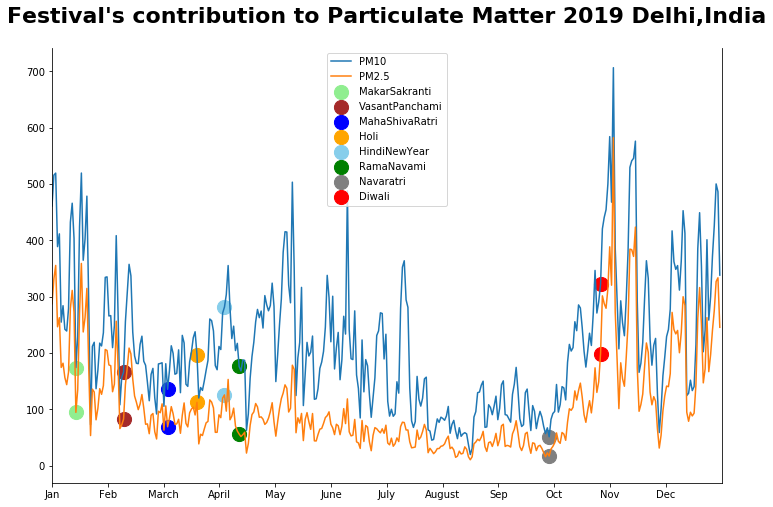

In [395]:
plt.figure(1,figsize=(12,8))
plt.plot(Delhi2019['Date'],Delhi2019['PM10'],label='PM10')
plt.plot(Delhi2019['Date'],Delhi2019['PM2.5'],label='PM2.5')
colors=['brown','lightgreen','brown','blue','orange','skyblue','green','grey','red']
for i in range(1,len(festivalsexp.columns)):
    plt.scatter(festivalsexp.loc[3,festivalsexp.columns[i]],Delhi2019.loc[festivalsexp.loc[3,festivalsexp.columns[i]],'PM2.5'],s=200,c=colors[i],label=festivalsexp.columns[i])
    plt.scatter(festivalsexp.loc[3,festivalsexp.columns[i]],Delhi2019.loc[festivalsexp.loc[3,festivalsexp.columns[i]],'PM10'],s=200,c=colors[i])
ax=plt.gca()
ax.set_xlim(1,365)
plt.xticks(np.linspace(0,365,13)[:-1], ('Jan', 'Feb','March','April','May','June','July','August','Sep','Oct', 'Nov', 'Dec'))
plt.title('Festival\'s contribution to Particulate Matter 2019 Delhi,India', loc='center',fontweight='bold',fontsize=22,pad=25)
#ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc=9)